# Grad-CAM

Gradient Class Activation Map (Grad-CAM) for a particular category indicates the discriminative image regions used by the CNN to identify that category.

In [1]:
import keras
import tensorflow as tf
import vis #keras visualisation package
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# Load pretrained model
from keras.applications.vgg16 import VGG16, preprocess_input

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# Load classes
import json
CLASS_INDEX = json.load(open("Documents/imagenet_class_index.json"))
classlabel  = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("N of class={}".format(len(classlabel)))

N of class=1000


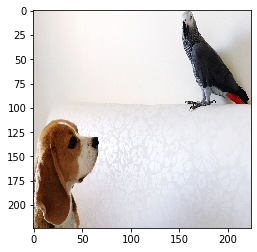

In [10]:
from keras.preprocessing.image import load_img, img_to_array

_img = load_img("Documents/dog_bird.jpg",target_size=(224,224))
plt.imshow(_img)
plt.show()

In [11]:
img               = img_to_array(_img)
img               = preprocess_input(img)
y_pred            = model.predict(img[np.newaxis,...])
class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
topNclass         = 5
for i, idx in enumerate(class_idxs_sorted[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,y_pred[0,idx]))

Top 1 predicted class:     Pr(Class=African_grey       [index=87])=0.494
Top 2 predicted class:     Pr(Class=beagle             [index=162])=0.172
Top 3 predicted class:     Pr(Class=Walker_hound       [index=166])=0.139
Top 4 predicted class:     Pr(Class=bluetick           [index=164])=0.072
Top 5 predicted class:     Pr(Class=basset             [index=161])=0.033


Very good predictions on this image.

In [12]:
from vis.visualization import visualize_cam
from vis.utils import utils

layer_idx = utils.find_layer_idx(model, 'predictions')
penultimate_layer_idx = utils.find_layer_idx(model, "block5_conv3") 
class_idx  = class_idxs_sorted[0]
seed_input = img
grad_top1  = visualize_cam(model, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

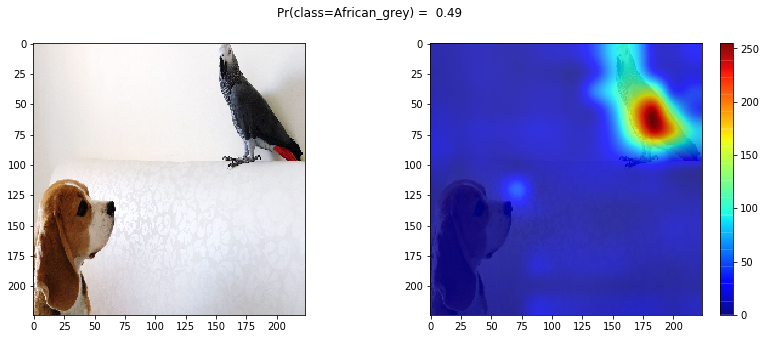

In [13]:
# Lets plot the most probable class
def plot_map(grads):
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(_img)
    axes[1].imshow(_img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
    plt.suptitle("Pr(class={}) = {:5.2f}".format(
                      classlabel[class_idx],
                      y_pred[0,class_idx]))
plot_map(grad_top1)

Here we can see on which region VGG16 made its prediction and we can confirm that the right object in the picture.

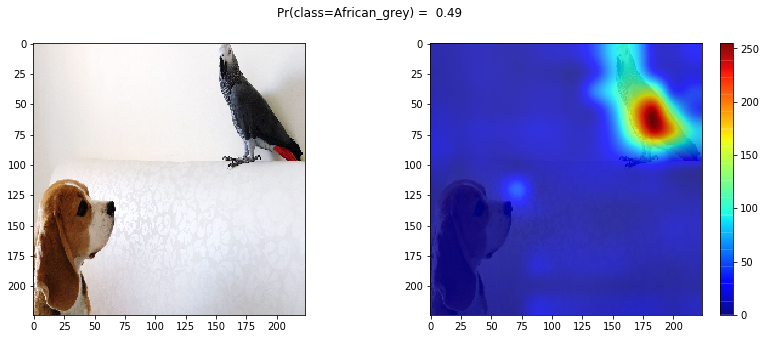

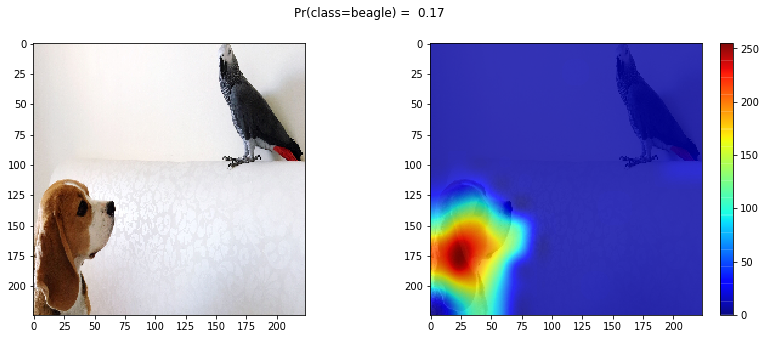

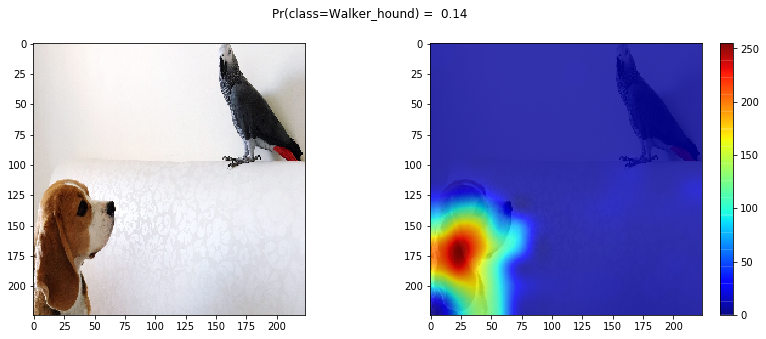

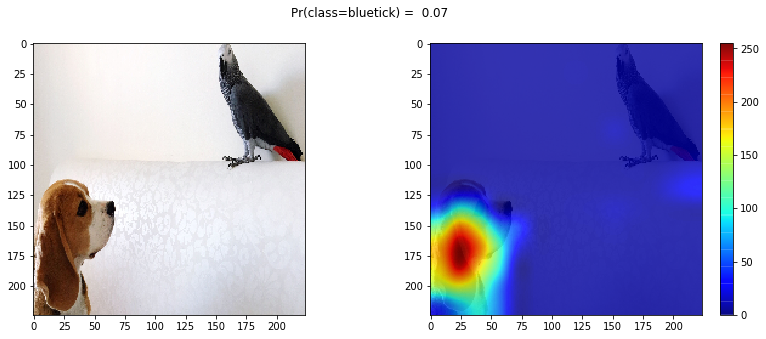

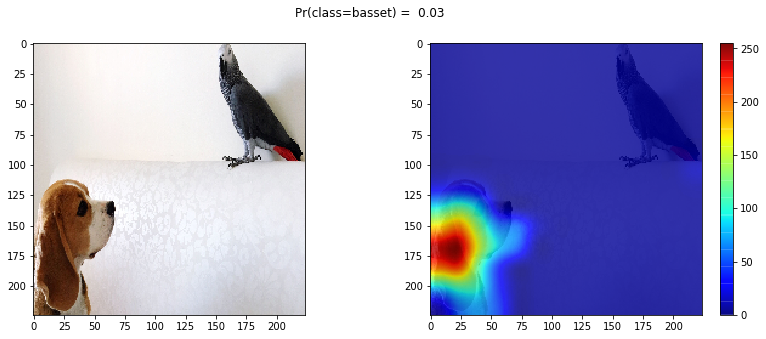

In [14]:
# Okey, lets plot the 5 most probable classes

for class_idx in class_idxs_sorted[:topNclass]:
    grads  = visualize_cam(model,layer_idx,class_idx, seed_input,
                           penultimate_layer_idx = penultimate_layer_idx,
                           backprop_modifier     = None,
                           grad_modifier         = None)
    plot_map(grads)

Whats good on these calss activation maps is that we can accually see that model made all its decisions based on the ears of this dog and indeed all these breeds of dogs have similarly shaped ears.